<a href="https://colab.research.google.com/github/jarodchristiansen/Machine-Learning-Deep-Learning/blob/master/EventAndEconomicAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycountry
!pip install geopy
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 27.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np


import plotly.express as px
import plotly.graph_objects as go

import pycountry
from geopy.geocoders import Nominatim
import time

### Load the data

In [ ]:
# https://www.kaggle.com/datasets/saketk511/world-important-events-ancient-to-modern?resource=download

def years_ago(arg: str) -> int:
    multiplier = -1 if 'BC' in arg else 1
    result = multiplier * int(arg.replace('BC', ''))
    return 2024 - result

WORLD = '/content/World Important Dates.csv'
events = pd.read_csv(filepath_or_buffer=WORLD, index_col=[0]).drop(columns=['Date', 'Month'])
events['years ago'] = events['Year'].apply(func=years_ago)
events.head()

Name of Incident     Year Country Type of Event  \
Sl. No                                                                        
1       Indus Valley Civilization Flourishes  2600 BC   India  Civilization   
2                    Battle of the Ten Kings  1400 BC   India        Battle   
6       Establishment of the Delhi Sultanate     1206   India     Political   
7                          Battle of Panipat     1526   India        Battle   
8               Establishment of British Raj     1858   India      Colonial   

          Place Name                                             Impact  \
Sl. No                                                                    
1       Indus Valley  Development of one of the world's earliest urb...   
2             Punjab  Rigvedic tribes consolidated their control ove...   
6              Delhi          Muslim rule established in parts of India   
7            Panipat           Foundation of the Mughal Empire in India   
8        Whole India        Start of direct British governance in India   

                            Affected Population  \
Sl. No                                            
1                             Local inhabitants   
2                               Rigvedic tribes   
6       People of Delhi and surrounding regions   
7                      Northern Indian kingdoms   
8                           Indian subcontinent   

       Important Person/Group Responsible   Outcome  years ago  
Sl. No                                                          
1                     Indus Valley people  Positive       4624  
2                                   Sudas  Positive       3424  
6           QutbUnknownudUnknowndin Aibak     Mixed        818  
7                                   Babur     Mixed        498  
8       British East India Company/Empire  Negative        166

In [ ]:
events.head().to_json('events.json', orient='records')

In [ ]:
px.histogram(data_frame=events, x='years ago', log_y=True, color='Outcome')

In [ ]:
px.scatter(data_frame=events[events['Outcome'] != 'Ongoing'], x='Type of Event', y='Country', facet_col='Outcome', height=3*2400, color='years ago',
       hover_name='Name of Incident', hover_data=['Place Name', 'Impact', 'Affected Population',
       'Important Person/Group Responsible',], facet_col_wrap=1)

In [ ]:
# # Convert year to century
# events['Century'] = events['Year'].apply(lambda x: (int(x) - 1) // 100 + 1)

# # Count the number of events per century
# events_per_century = events.groupby('Century').size().reset_index(name='Number of Events')

# # Create the line plot
# fig = px.line(events_per_century, x='Century', y='Number of Events', title='Number of Events Per Century')
# fig.update_layout(xaxis_title='Century', yaxis_title='Number of Events', xaxis=dict(tickmode='linear'))
# fig.show()

ValueError: invalid literal for int() with base 10: '2600 BC'

In [ ]:
events

Name of Incident     Year Country  \
Sl. No                                                          
1       Indus Valley Civilization Flourishes  2600 BC   India   
2                    Battle of the Ten Kings  1400 BC   India   
6       Establishment of the Delhi Sultanate     1206   India   
7                          Battle of Panipat     1526   India   
8               Establishment of British Raj     1858   India   
...                                      ...      ...     ...   
1147           First Mexican Empire Declared     1821  Mexico   
1148                  U.S.UnknownMexican War     1846  Mexico   
1149                             Reform Wars     1857  Mexico   
1150           French Intervention in Mexico     1862  Mexico   
1151                      Mexican Revolution     1910  Mexico   

                Type of Event       Place Name  \
Sl. No                                           
1                Civilization     Indus Valley   
2                      Battle           Punjab   
6                   Political            Delhi   
7                      Battle          Panipat   
8                    Colonial      Whole India   
...                       ...              ...   
1147                Political           Mexico   
1148                 Military  Northern Mexico   
1149                Civil War           Mexico   
1150    Military Intervention           Mexico   
1151               Revolution           Mexico   

                                                   Impact  \
Sl. No                                                      
1       Development of one of the world's earliest urb...   
2       Rigvedic tribes consolidated their control ove...   
6               Muslim rule established in parts of India   
7                Foundation of the Mughal Empire in India   
8             Start of direct British governance in India   
...                                                   ...   
1147    Brief establishment of an empire soon transiti...   
1148        Loss of vast territories to the United States   
1149    Liberal vs. Conservative conflict leading to c...   
1150    Establishment and fall of the Second Mexican E...   
1151    Major revolution that transformed Mexican poli...   

                            Affected Population  \
Sl. No                                            
1                             Local inhabitants   
2                               Rigvedic tribes   
6       People of Delhi and surrounding regions   
7                      Northern Indian kingdoms   
8                           Indian subcontinent   
...                                         ...   
1147                                   Mexicans   
1148                                   Mexicans   
1149                                   Mexicans   
1150                                   Mexicans   
1151                                   Mexicans   

       Important Person/Group Responsible   Outcome  years ago  
Sl. No                                                          
1                     Indus Valley people  Positive       4624  
2                                   Sudas  Positive       3424  
6           QutbUnknownudUnknowndin Aibak     Mixed        818  
7                                   Babur     Mixed        498  
8       British East India Company/Empire  Negative        166  
...                                   ...       ...        ...  
1147                  Agustín de Iturbide  Positive        203  
1148                                   US  Negative        178  
1149                        Benito Juárez     Mixed        167  
1150                         Napoleon III  Negative        162  
1151                  Francisco I. Madero  Positive        114  

[1096 rows x 10 columns]

In [ ]:
# Add latitude and longitude for each country (you can use a predefined dictionary for more accuracy)
country_coords = {
    'India': {'lat': 20.5937, 'lon': 78.9629},
    # Add coordinates for other countries as needed
}

# Extract coordinates
events['lat'] = events['Country'].map(lambda country: country_coords.get(country, {}).get('lat', None))
events['lon'] = events['Country'].map(lambda country: country_coords.get(country, {}).get('lon', None))

# Drop rows with missing coordinates
events.dropna(subset=['lat', 'lon'], inplace=True)

# Create the map
fig = px.scatter_geo(events,
                     lat='lat',
                     lon='lon',
                     hover_name='Name of Incident',
                     hover_data={'Year': True, 'Type of Event': True, 'Impact': True},
                     text='Country',
                     title='Historical Events Around the World',
                     template='plotly')

# Update layout for better visualization
fig.update_layout(
    geo=dict(
        scope='world',
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(217, 217, 217)',
        subunitcolor='rgb(255, 255, 255)',
        countrycolor='rgb(255, 255, 255)'
    )
)

# Show the map
fig.show()

## Import economic datasets

In [ ]:
# https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2023
economic_dfs = pd.read_excel('/content/mpd2023_web.xlsx', sheet_name=None)

In [ ]:
economic_dfs.keys()

dict_keys(['Notes', 'Sources', 'GDPpc', 'Population', 'Full data', 'Regional data', 'Maddison original sources'])

In [ ]:
economic_dfs['Full data'].head()
economic_data_df = economic_dfs['Full data']

In [ ]:
economic_data_df

countrycode      country                     region  year        gdppc  \
0              AFG  Afghanistan  South and South East Asia     1          NaN   
1              AFG  Afghanistan  South and South East Asia   730          NaN   
2              AFG  Afghanistan  South and South East Asia  1000          NaN   
3              AFG  Afghanistan  South and South East Asia  1090          NaN   
4              AFG  Afghanistan  South and South East Asia  1150          NaN   
...            ...          ...                        ...   ...          ...   
131139         ZWE     Zimbabwe         Sub Saharan Africa  2018  1900.199191   
131140         ZWE     Zimbabwe         Sub Saharan Africa  2019  1753.024449   
131141         ZWE     Zimbabwe         Sub Saharan Africa  2020  1585.972804   
131142         ZWE     Zimbabwe         Sub Saharan Africa  2021  1687.253154   
131143         ZWE     Zimbabwe         Sub Saharan Africa  2022  1703.529373   

             pop  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
131139  14096.56  
131140  14344.59  
131141  14614.82  
131142  14900.01  
131143  15204.66  

[131144 rows x 6 columns]

In [ ]:
economic_dfs['Regional data'].head()

Unnamed: 0  \
0         NaN   
1      1820.0   
2      1830.0   
3      1840.0   
4      1850.0   

  Regional GDPpc based on all GDP pc and population estimates available  \
0                                          East Asia                      
1                                         911.159926                      
2                                                846                      
3                                                849                      
4                                         899.657658                      

       Unnamed: 2     Unnamed: 3                    Unnamed: 4  \
0  Eastern Europe  Latin America  Middle East and North Africa   
1     1044.538462      956.90712                    885.899599   
2             NaN            925                           NaN   
3             NaN           1081                           NaN   
4     1290.561798    1067.858361                           NaN   

                  Unnamed: 5          Unnamed: 6      Unnamed: 7  \
0  South and South East Asia  Sub Saharan Africa  Western Europe   
1                 919.201211                1188     2170.704817   
2                 934.895891                 NaN     2314.693145   
3                 938.789859                 NaN       2528.1648   
4                 926.960126                 NaN     2670.193221   

          Unnamed: 8  World GDP pc  Unnamed: 10 Regional Population   \
0  Western Offshoots           NaN          NaN            East Asia   
1        2513.045418   1127.729974          NaN               427757   
2        2886.763228           NaN          NaN                  NaN   
3        3167.864246           NaN          NaN                  NaN   
4        3474.410149   1300.501949          NaN               455774   

      Unnamed: 12    Unnamed: 13                   Unnamed: 14  \
0  Eastern Europe  Latin America  Middle East and North Africa   
1           91222          20704                         35936   
2             NaN            NaN                           NaN   
3             NaN            NaN                           NaN   
4          118161          30671                         42000   

                 Unnamed: 15      Unnamed: 16     Unnamed: 17  \
0  South and South East Asia  Sub Saharan SSA  Western Europe   
1                     255695            60000          139472   
2                        NaN              NaN             NaN   
3                        NaN              NaN             NaN   
4                     278706            65000          172226   

         Unnamed: 18       Unnamed: 19  
0  Western Offshoots  World Population  
1              11231           1042017  
2                NaN               NaN  
3                NaN               NaN  
4              26760           1189298

In [ ]:
economic_dfs['Notes'].head()

Maddison Project Database (MPD) 2023 Unnamed: 1
0                                    Citation policy        NaN
1                                                NaN        NaN
2  CONDITIONS UNDER WHICH ALL ORIGINAL PAPERS MUS...        NaN
3                                                NaN        NaN
4      a) If the data is shown in any graphical form        NaN

In [ ]:
# Convert 'year' to int if it's not already
economic_data_df['year'] = economic_data_df['year'].astype(int)

# Replace NaNs with 0 or any appropriate method of handling missing values
economic_data_df['gdppc'] = economic_data_df['gdppc'].fillna(0)
economic_data_df['pop'] = economic_data_df['pop'].fillna(0)
economic_data_df

countrycode      country                     region  year        gdppc  \
0              AFG  Afghanistan  South and South East Asia     1     0.000000   
1              AFG  Afghanistan  South and South East Asia   730     0.000000   
2              AFG  Afghanistan  South and South East Asia  1000     0.000000   
3              AFG  Afghanistan  South and South East Asia  1090     0.000000   
4              AFG  Afghanistan  South and South East Asia  1150     0.000000   
...            ...          ...                        ...   ...          ...   
131139         ZWE     Zimbabwe         Sub Saharan Africa  2018  1900.199191   
131140         ZWE     Zimbabwe         Sub Saharan Africa  2019  1753.024449   
131141         ZWE     Zimbabwe         Sub Saharan Africa  2020  1585.972804   
131142         ZWE     Zimbabwe         Sub Saharan Africa  2021  1687.253154   
131143         ZWE     Zimbabwe         Sub Saharan Africa  2022  1703.529373   

             pop  
0           0.00  
1           0.00  
2           0.00  
3           0.00  
4           0.00  
...          ...  
131139  14096.56  
131140  14344.59  
131141  14614.82  
131142  14900.01  
131143  15204.66  

[131144 rows x 6 columns]

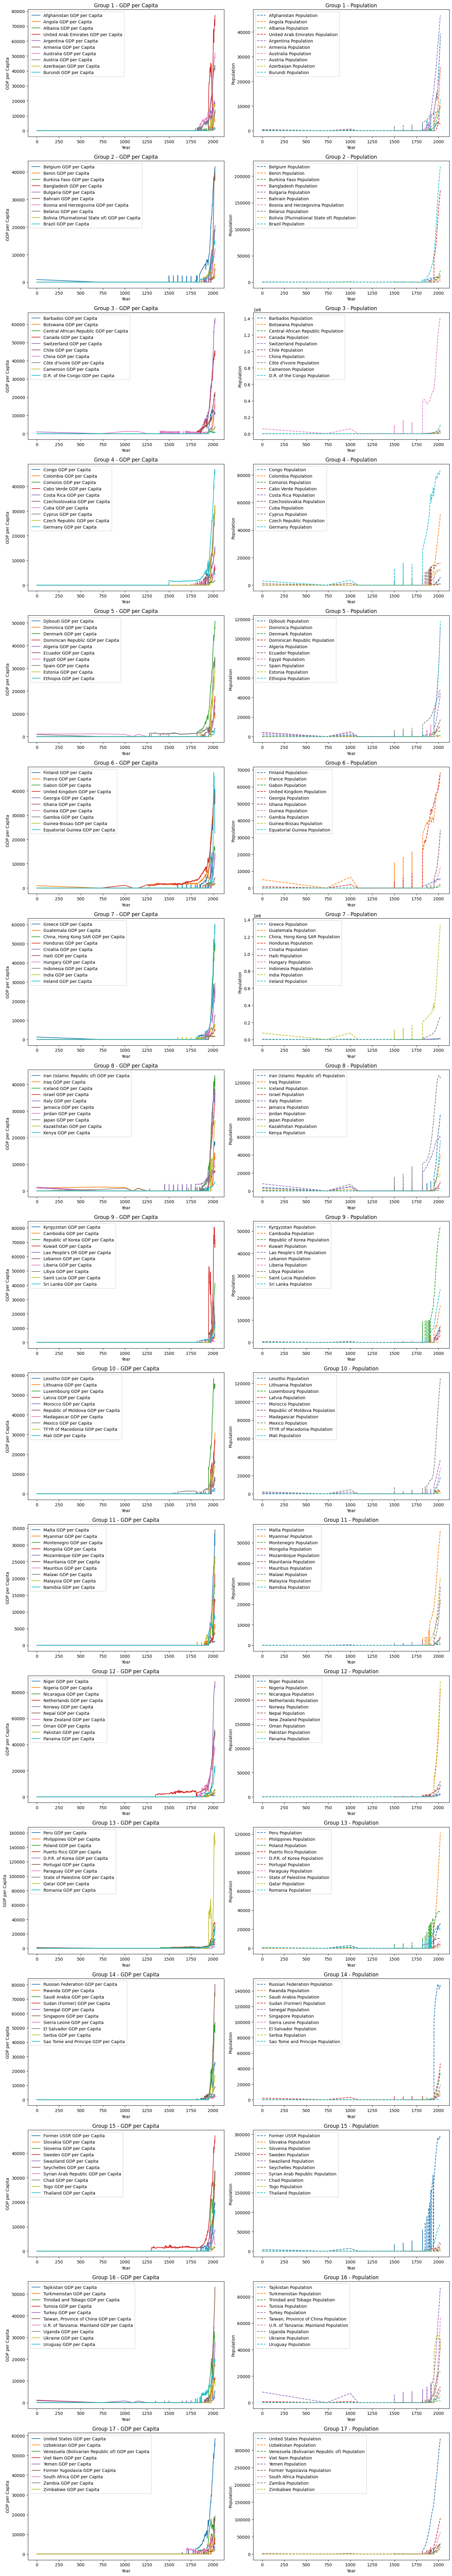

In [ ]:
# # Function to plot GDP per capita and Population for all countries on one plot
# def plot_combined_time_series(df):
#     countries = df['country'].unique()

#     fig, ax1 = plt.subplots(figsize=(24, 60))

#     for country in countries:
#         country_df = df[df['country'] == country]

#         # Plot GDP per capita
#         ax1.plot(country_df['year'], country_df['gdppc'], label=f'{country} GDP per Capita')

#     ax1.set_xlabel('Year')
#     ax1.set_ylabel('GDP per Capita', color='tab:blue')
#     ax1.tick_params(axis='y', labelcolor='tab:blue')

#     # Create a second y-axis to plot Population
#     ax2 = ax1.twinx()

#     for country in countries:
#         country_df = df[df['country'] == country]

#         ax2.plot(country_df['year'], country_df['pop'], linestyle='--', label=f'{country} Population')

#     ax2.set_ylabel('Population', color='tab:green')
#     ax2.tick_params(axis='y', labelcolor='tab:green')

#     # Combine the legends of both y-axes
#     lines_1, labels_1 = ax1.get_legend_handles_labels()
#     lines_2, labels_2 = ax2.get_legend_handles_labels()
#     ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

#     plt.title('Time Series of GDP per Capita and Population for All Countries')
#     fig.tight_layout()
#     plt.show()

# # Call the function
# plot_combined_time_series(economic_data_df)


# Function to plot GDP per capita and Population for groups of countries
def plot_grouped_time_series(df, group_size=10):
    countries = df['country'].unique()
    num_groups = len(countries) // group_size + 1

    fig, axs = plt.subplots(num_groups, 2, figsize=(15, 5 * num_groups))
    axs = axs.flatten()

    for i in range(num_groups):
        group_countries = countries[i * group_size:(i + 1) * group_size]

        for country in group_countries:
            country_df = df[df['country'] == country]

            axs[2 * i].plot(country_df['year'], country_df['gdppc'], label=f'{country} GDP per Capita')
            axs[2 * i + 1].plot(country_df['year'], country_df['pop'], linestyle='--', label=f'{country} Population')

        axs[2 * i].set_title(f'Group {i + 1} - GDP per Capita')
        axs[2 * i].set_xlabel('Year')
        axs[2 * i].set_ylabel('GDP per Capita')
        axs[2 * i].legend()

        axs[2 * i + 1].set_title(f'Group {i + 1} - Population')
        axs[2 * i + 1].set_xlabel('Year')
        axs[2 * i + 1].set_ylabel('Population')
        axs[2 * i + 1].legend()

    plt.tight_layout()
    plt.show()

# Call the function
plot_grouped_time_series(economic_data_df, group_size=10)

In [ ]:
# Assuming economic_data_df is already loaded and cleaned

# Create unique list of countries for the dropdown menu
countries = economic_data_df['country'].unique()

# Initialize the figure
fig = go.Figure()

# Add traces for all countries (initially hidden)
for country in countries:
    country_df = economic_data_df[economic_data_df['country'] == country]

    fig.add_trace(go.Scatter(
        x=country_df['year'], y=country_df['gdppc'],
        mode='lines', name=f'{country} GDP per Capita',
        visible=False
    ))

    fig.add_trace(go.Scatter(
        x=country_df['year'], y=country_df['pop'],
        mode='lines', name=f'{country} Population',
        visible=False, yaxis='y2'
    ))

# Create dropdown menu
dropdown_buttons = []
for i, country in enumerate(countries):
    dropdown_buttons.append(
        dict(
            label=country,
            method='update',
            args=[
                {'visible': [j == 2 * i or j == 2 * i + 1 for j in range(2 * len(countries))]},
                {'title': f'GDP per Capita and Population Over Time - {country}'}
            ]
        )
    )

# Update layout for the combined plot
fig.update_layout(
    title='GDP per Capita and Population Over Time',
    xaxis_title='Year',
    yaxis_title='GDP per Capita',
    yaxis2=dict(
        title='Population',
        overlaying='y',
        side='right'
    ),
    legend_title='Country',
    updatemenus=[
        dict(
            active=0,
            buttons=dropdown_buttons,
            direction="down",
            showactive=True,
            x=0.17,
            xanchor="left",
            y=1.15,
            yanchor="top"
        )
    ]
)

# Set the first country to be visible by default
fig.data[0].visible = True
fig.data[1].visible = True

fig.show()

### explore the data

In [ ]:
# events.loc[economic_data_df['country'] == 'United States', “column_name”] = “value”
# updates all records of country = USA in events to be 'United States'
events.loc[events['Country'] == 'USA', 'Country'] = 'United States'
events.loc[events['Country'] == 'UK', 'Country'] = 'United Kingdom'
events.loc[events['Country'] == 'South Korea', 'Country'] = 'Republic of Korea'
events.loc[events['Country'] == 'USSR', 'Country'] = 'Former USSR'
events.loc[events['Country'] == 'Soviet Union', 'Country'] = 'Former USSR'
events.loc[events['Country'] == 'Sudan', 'Country'] = 'Sudan (Former)'
events.loc[events['Country'] == 'South Sudan', 'Country'] = 'Sudan (Former)'
events.loc[events['Country'] == 'North Korea', 'Country'] = 'D.P.R. of Korea'
events.loc[events['Country'] == 'Taiwan', 'Country'] = 'Taiwan, Province of China'
events.loc[events['Country'] == 'Vietnam', 'Country'] = 'Viet Nam'
events.loc[events['Country'] == 'Congo (DRC)', 'Country'] = 'D.R. of the Congo'
events.loc[events['Country'] == 'Russia', 'Country'] = 'Russian Federation'
events.loc[events['Country'] == 'Iran', 'Country'] = 'Iran (Islamic Republic of)'
events.loc[events['Country'] == 'Tanzania', 'Country'] = 'U.R. of Tanzania: Mainland'

events.loc[events['Country'] == 'Swaziland (Eswatini)', 'Country'] = 'Swaziland'
events.loc[events['Country'] == 'Cape Verde', 'Country'] = 'Cabo Verde'
events.loc[events['Country'] == 'GuineaUnknownBissau ', 'Country'] = 'Guinea-Bissau'
events.loc[events['Country'] == 'Kuwait, Iraq ', 'Country'] = 'Kuwait'



print('Economics countries count:', economic_data_df['country'].nunique())
print('Economic years count:', economic_data_df['year'].nunique())

print('Events countries count:', events['Country'].nunique())
print('Events years count:', events['Year'].nunique())

# map of countries in economics but not in events
countries_missing_events = set(economic_data_df['country']) - set(events['Country'])
print('Countries in economics but not in events:', countries_missing_events, len(countries_missing_events))

# # map of countries in events but not in economics
countries_missing_economics = set(events['Country']) - set(economic_data_df['country'])
print('Countries in events but not in economics:', countries_missing_economics)



Economics countries count: 169
Economic years count: 776
Events countries count: 1
Events years count: 50
Countries in economics but not in events: {'Iceland', 'Congo', 'Czech Republic', 'Guinea', 'Uruguay', 'Kuwait', 'Tunisia', 'Georgia', 'Zambia', 'Benin', 'Republic of Korea', "Côte d'Ivoire", 'Taiwan, Province of China', 'Mexico', 'Italy', 'Brazil', 'Comoros', 'Denmark', 'Poland', 'Togo', 'Lebanon', 'Albania', 'Cameroon', 'Greece', 'Yemen', 'Sri Lanka', 'Egypt', "Lao People's DR", 'Trinidad and Tobago', 'Nepal', 'Libya', 'Indonesia', 'Costa Rica', 'Spain', 'Kazakhstan', 'Belgium', 'United States', 'TFYR of Macedonia', 'Canada', 'Dominican Republic', 'Hungary', 'Russian Federation', 'Austria', 'Czechoslovakia', 'Germany', 'Uzbekistan', 'Qatar', 'Rwanda', 'Guinea-Bissau', 'D.R. of the Congo', 'Zimbabwe', 'Singapore', 'Senegal', 'Cyprus', 'United Arab Emirates', 'Mongolia', 'Slovakia', 'Seychelles', 'Sierra Leone', 'Chile', 'Haiti', 'Nicaragua', 'Ireland', 'Gabon', 'China', 'Sudan (For

In [ ]:
print(economic_data_df.info())

# Summary statistics
print(economic_data_df.describe(include='all'))

# Check for missing values
print(economic_data_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131144 entries, 0 to 131143
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   countrycode  131144 non-null  object 
 1   country      131144 non-null  object 
 2   region       131144 non-null  object 
 3   year         131144 non-null  int64  
 4   gdppc        131144 non-null  float64
 5   pop          131144 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None
       countrycode      country              region           year  \
count       131144       131144              131144  131144.000000   
unique         169          169                   8            NaN   
top            AFG  Afghanistan  Sub Saharan Africa            NaN   
freq           776          776               35696            NaN   
mean           NaN          NaN                 NaN    1631.569588   
std            NaN          NaN                 NaN     234

In [ ]:
# Summary of the DataFrame
print(events.info())

# Summary statistics
print(events.describe(include='all'))

# Check for missing values
print(events.isnull().sum())

# Check for unique values in the 'Outcome' column
print(events['Outcome'].value_counts())


<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 1 to 84
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Incident                    74 non-null     object 
 1   Year                                74 non-null     object 
 2   Country                             74 non-null     object 
 3   Type of Event                       74 non-null     object 
 4   Place Name                          74 non-null     object 
 5   Impact                              74 non-null     object 
 6   Affected Population                 74 non-null     object 
 7   Important Person/Group Responsible  74 non-null     object 
 8   Outcome                             74 non-null     object 
 9   years ago                           74 non-null     int64  
 10  lat                                 74 non-null     float64
 11  lon                                 74 non-null     

### cleaning the events data

In [ ]:
# Check for missing values
missing_data = events.isnull().sum()
print("Missing Data:\n", missing_data)

# Optionally, fill or drop missing data
# Example: Fill 'Unknown' dates with NaN and then handle them
events.replace("Unknown", pd.NA, inplace=True)
events.dropna(subset=['Date', 'Month', 'Year'], inplace=True)  # Or use fillna() to fill missing values

# Re-check for missing values
print(events.isnull().sum())


Missing Data:
 Name of Incident                      0
Year                                  0
Country                               0
Type of Event                         0
Place Name                            0
Impact                                0
Affected Population                   0
Important Person/Group Responsible    0
Outcome                               0
years ago                             0
lat                                   0
lon                                   0
dtype: int64


KeyError: ['Date', 'Month']

In [ ]:
# Function to standardize date format
def parse_date(row):
    if row['Year'].endswith('BC'):
        year = -int(row['Year'].replace(' BC', ''))
    else:
        year = int(row['Year'])

    # Use January 1st as the default date for 'Unknown' dates
    month = row['Month'] if pd.notna(row['Month']) else 'January'
    date = row['Date'] if pd.notna(row['Date']) else '1'

    return pd.to_datetime(f"{year}-{month}-{date}", errors='coerce')

# Apply the function to create a new standardized date column
events['Standardized Date'] = events.apply(parse_date, axis=1)

# Display the DataFrame with the new standardized date column
print(events[['Name of Incident', 'Year', 'Month', 'Date', 'Standardized Date']].head())

KeyError: 'Month'

In [ ]:
events.head()

Name of Incident     Year Country Type of Event  \
Sl. No                                                                        
1       Indus Valley Civilization Flourishes  2600 BC   India  Civilization   
2                    Battle of the Ten Kings  1400 BC   India        Battle   
6       Establishment of the Delhi Sultanate     1206   India     Political   
7                          Battle of Panipat     1526   India        Battle   
8               Establishment of British Raj     1858   India      Colonial   

          Place Name                                             Impact  \
Sl. No                                                                    
1       Indus Valley  Development of one of the world's earliest urb...   
2             Punjab  Rigvedic tribes consolidated their control ove...   
6              Delhi          Muslim rule established in parts of India   
7            Panipat           Foundation of the Mughal Empire in India   
8        Whole India        Start of direct British governance in India   

                            Affected Population  \
Sl. No                                            
1                             Local inhabitants   
2                               Rigvedic tribes   
6       People of Delhi and surrounding regions   
7                      Northern Indian kingdoms   
8                           Indian subcontinent   

       Important Person/Group Responsible   Outcome  years ago      lat  \
Sl. No                                                                    
1                     Indus Valley people  Positive       4624  20.5937   
2                                   Sudas  Positive       3424  20.5937   
6           QutbUnknownudUnknowndin Aibak     Mixed        818  20.5937   
7                                   Babur     Mixed        498  20.5937   
8       British East India Company/Empire  Negative        166  20.5937   

            lon  
Sl. No           
1       78.9629  
2       78.9629  
6       78.9629  
7       78.9629  
8       78.9629

In [ ]:
events['Standardized Date'] = pd.to_datetime(events['Standardized Date'], unit='ms')

KeyError: 'Standardized Date'

### Analyzing the data

In [ ]:
# Check the distribution of 'Outcome' labels
outcome_distribution = events['Outcome'].value_counts()
print("Outcome Distribution:\n", outcome_distribution)

# Check for inconsistencies or potential biases
# Example: Examine how different event types are labeled
outcome_by_event_type = events.groupby('Type of Event')['Outcome'].value_counts(normalize=True).unstack()
print("Outcome by Event Type:\n", outcome_by_event_type)

Outcome Distribution:
 Outcome
Positive    368
Negative    182
Mixed        89
Ongoing       1
Name: count, dtype: int64
Outcome by Event Type:
 Outcome                          Mixed  Negative  Ongoing  Positive
Type of Event                                                      
Accident                           NaN  1.000000      NaN       NaN
Administrative                     NaN  0.500000      NaN  0.500000
Annexation                         NaN  1.000000      NaN       NaN
AntiUnknownCorruption Effort  1.000000       NaN      NaN       NaN
Aviation                           NaN  0.900000      NaN  0.100000
...                                ...       ...      ...       ...
Violent Protest                    NaN  1.000000      NaN       NaN
War                           0.142857  0.714286      NaN  0.142857
War Declaration                    NaN  1.000000      NaN       NaN
World Expo                         NaN       NaN      NaN  1.000000
World's Fair                       NaN 

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


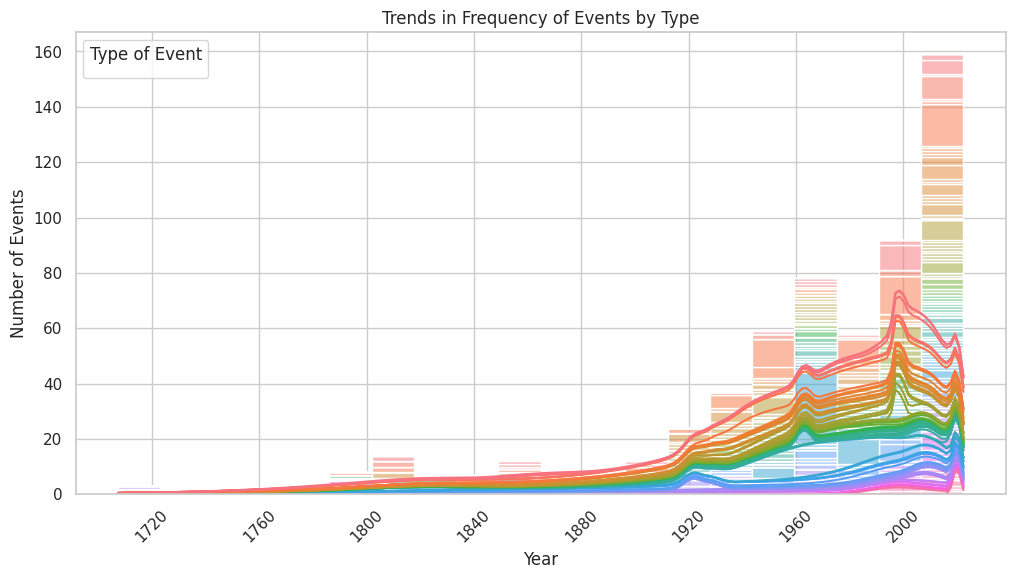

In [ ]:
# Plot the trends in frequency of events by type
plt.figure(figsize=(12, 6))
sns.histplot(data=events, x='Standardized Date', hue='Type of Event', multiple='stack', bins=20, kde=True)
plt.title('Trends in Frequency of Events by Type')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend(title='Type of Event')
plt.show()

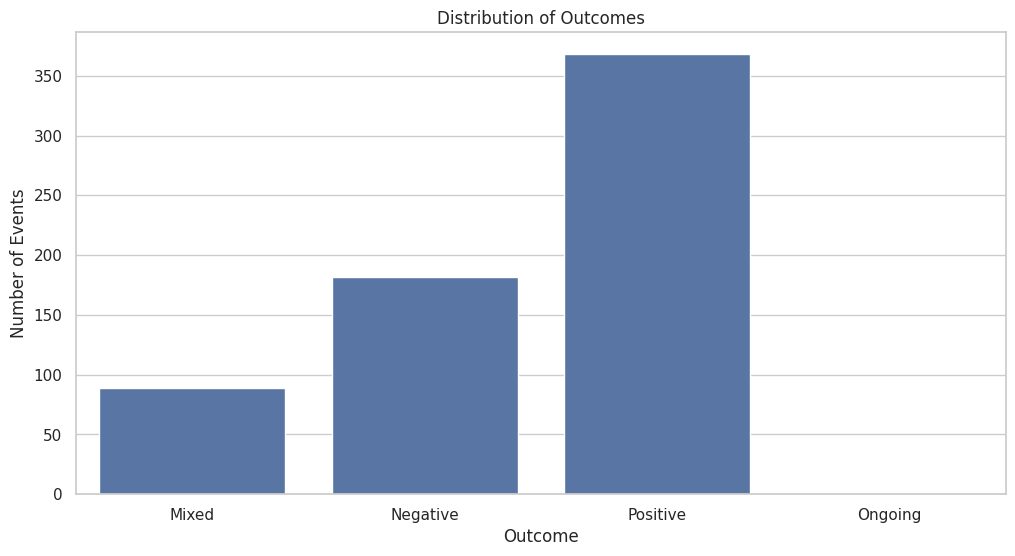

In [ ]:
# Plot the distribution of outcomes
plt.figure(figsize=(12, 6))
sns.countplot(data=events, x='Outcome')
plt.title('Distribution of Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Events')
plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Define a dropdown widget
country_selector = widgets.Dropdown(
    options=economic_data_df['country'].unique(),
    description='Country:',
)

# Update the plot based on the selected country
def on_country_change(change):
    global selected_country
    selected_country = change.new

country_selector.observe(on_country_change, names='value')

# Display the widget
display(country_selector)

Dropdown(description='Country:', options=('Afghanistan', 'Angola', 'Albania', 'United Arab Emirates', 'Argenti…

In [ ]:
print(selected_country)

United States


In [ ]:
# Create an interactive plot
# def plot_country_data(selected_country):
#     # Filter economic data for the selected country
#     econ_data = economic_data_df[economic_data_df['country'] == selected_country]

#     # Filter events data for the selected country
#     events_data = events[events['Country'] == selected_country]

#     # Create the plot
#     fig = px.line(econ_data, x='year', y='gdppc', title=f'Economic Data and Historical Events for {selected_country}')

#     # Add events as scatter points
#     fig.add_scatter(x=events_data['Year'], y=[0]*len(events_data), mode='markers',
#                     marker=dict(color='red', size=10),
#                     name='Historical Events')

#     # Add annotations for events
#     for _, row in events_data.iterrows():
#         fig.add_annotation(x=row['Year'], y=0, text=row['Name of Incident'], showarrow=True, arrowhead=2)

#     fig.show()

# # Example usage
# plot_country_data(selected_country)



def plot_country_data(selected_country):
    # Filter economic data for the selected country
    econ_data = economic_data_df[economic_data_df['country'] == selected_country]

    # Filter events data for the selected country
    events_data = events[events['Country'] == selected_country]

    # Create the plot
    fig = px.line(econ_data, x='year', y='gdppc', title=f'Economic Data and Historical Events for {selected_country}')

    # Ensure `gdppc` values are not null for plotting
    econ_data = econ_data.dropna(subset=['gdppc'])

    # Add events as scatter points
    for _, event_row in events_data.iterrows():
        event_year = event_row['Year']
        # Find the corresponding `gdppc` value for the event year
        gdppc_value = econ_data[econ_data['year'] == event_year]['gdppc']
        if not gdppc_value.empty:
            gdppc_value = gdppc_value.values[0]
        else:
            # If no exact year match, find the closest available year
            closest_year = econ_data['year'].iloc[(econ_data['year'] - event_year).abs().argsort()[:1]]
            gdppc_value = econ_data[econ_data['year'] == closest_year.values[0]]['gdppc'].values[0]

        fig.add_scatter(x=[event_year], y=[gdppc_value], mode='markers',
                        marker=dict(color='red', size=10),
                        name='Historical Events', text=event_row['Name of Incident'],
                        hoverinfo='text+x+y')

    # Add annotations for events
    for _, row in events_data.iterrows():
        event_year = row['Year']
        # Find the corresponding `gdppc` value for the event year
        gdppc_value = econ_data[econ_data['year'] == event_year]['gdppc']
        if not gdppc_value.empty:
            gdppc_value = gdppc_value.values[0]
        else:
            # If no exact year match, find the closest available year
            closest_year = econ_data['year'].iloc[(econ_data['year'] - event_year).abs().argsort()[:1]]
            gdppc_value = econ_data[econ_data['year'] == closest_year.values[0]]['gdppc'].values[0]

        fig.add_annotation(x=event_year, y=gdppc_value, text=row['Name of Incident'],
                           showarrow=True, arrowhead=2)

    fig.show()

# Example usage
plot_country_data(selected_country)

In [ ]:
# # Example usage
plot_country_data(selected_country=)